In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# split the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# get y_hat probabilities
y_hat = model.predict_proba(X_test)

# retrieve the probabilities for the positive '1' class
pos_probs = y_hat[:, 1]


# Precision and Recall for various score thresholds and PR Curve comparison with sklearn func

In [3]:
# Calculate the Precision and Recall for different prediction score thresholds instead of just considering 0.5 for logistic regression
def calculate_precison_recall_for_binary_classes(y_true, y_pred):
    tp, fp, tn, fn = 0, 0, 0, 0
    for gt, pred in zip(y_true, y_pred):
        gt, pred = int(gt),int(pred)
        if gt == pred==1:tp+=1
        elif gt==1 and pred==0:fn+=1
        elif gt==0 and pred==1:fp+=1
        else:tn+=1

    try:precision = tp/(tp+fp)
    except:precision = 1.0

    try:recall = tp/(tp+fn)
    except:recall = 1.0

    return precision, recall

precision_scores, recall_scores = [], []
score_thresholds = np.linspace(0.0, 1.0, 500)

for score_thresh in score_thresholds:
    
    y_pred = (pos_probs > score_thresh) * 1

    precision, recall = calculate_precison_recall_for_binary_classes(y_true=y_test, y_pred=y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)

In [4]:
p, r, thresh = precision_recall_curve(y_test, pos_probs) # sklearn uses 500 score thresholds

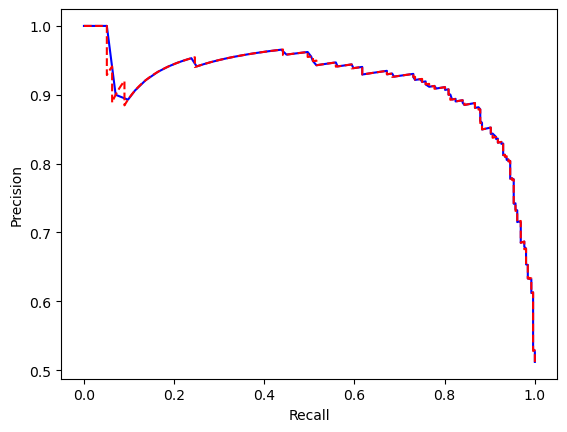

In [5]:
# Plot P_R curve
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recall_scores, precision_scores, label="Func pr value pairs", color="blue")
plt.plot(r, p, label="sklearn pr value pairs", color="red", linestyle='--')
plt.show()

# Area under curve i.e Average Precision Calculation comparison against sklearn func

In [6]:
'''
AUC:
1. One way to calculate auc is from sklearn auc() or average_precison() functions.

2.  I want to calculate AUC using my own function.
    - Using Trapezoidal Rule: 
        - Get difference of precision values for associated recall scores.
        - Note that the recall values should be sorted
        AUC = sum(recall_diff * precision_diff)/2
Note : Trapezoid rule is not the most accurate way of calculating integrals. Simpson's rule is more accurate.    
'''

"\nAUC:\n1. One way to calculate auc is from sklearn auc() or average_precison() functions.\n\n2.  I want to calculate AUC using my own function.\n    - Using Trapezoidal Rule: \n        - Get difference of precision values for associated recall scores.\n        - Note that the recall values should be sorted\n        AUC = sum(recall_diff * precision_diff)/2\nNote : Trapezoid rule is not the most accurate way of calculating integrals. Simpson's rule is more accurate.    \n"

In [7]:
def calculate_auc(precision_scores, recall_scores):
    sorted_recall_indexes = np.argsort(recall_scores)

    sorted_recall_scores = [recall_scores[idx] for idx in sorted_recall_indexes]
    associated_precision_scores = [precision_scores[idx] for idx in sorted_recall_indexes]

    recall_diff, precision_diff = [], []
    for i in range(1, len(recall_scores)):
        re = sorted_recall_scores[i] - sorted_recall_scores[i-1]
        pr = associated_precision_scores[i] + associated_precision_scores[i-1]

        recall_diff.append(re)
        precision_diff.append(pr)

    #Multiply recall_diff and precision_diff list elements and then take sum and divide by 2
    auc = np.dot(recall_diff , precision_diff)/2
    return auc


In [8]:
auc(r, p), calculate_auc(precision_scores, recall_scores)

(0.9174730691192857, 0.9178281766882705)

# F1 Score over different thresholds used for calculating Precision and Recall values

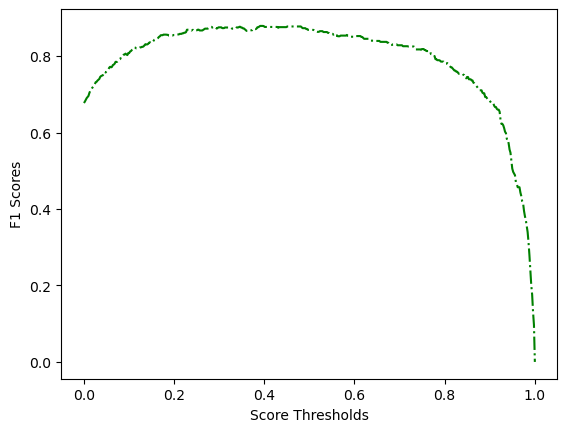

In [9]:
f1_scores  = [(2*p*r)/(p+r) for p, r in zip(precision_scores, recall_scores)]

# Plot F1 scores against score thresholds used to find most optimimum score thresh that gives highest F1 score
plt.xlabel("Score Thresholds")
plt.ylabel("F1 Scores")
plt.plot(score_thresholds, f1_scores, color='Green', linestyle='dashdot')
plt.show()

# Confusion Matrix

In [10]:
# Consider thresh that yields max f1 score
max_f1_idx = f1_scores.index(max(f1_scores))

best_score_thresh = score_thresholds[max_f1_idx]

def create_binary_confusion_matrix(score_thresh, y_true, y_pred_probs):

    y_pred = (y_pred_probs > score_thresh) * 1
    cm = np.zeros(shape=(2,2),dtype=np.int64)

    for gt, pred in zip(y_true, y_pred):
        gt, pred = int(gt),int(pred)
        cm[gt, pred]+=1

    cm_sklearn = confusion_matrix(y_true=y_true, y_pred=y_pred)
    return cm, cm_sklearn

cm, cm_sklearn = create_binary_confusion_matrix(score_thresh=best_score_thresh, y_true=y_test, y_pred_probs=pos_probs)


In [14]:
cm, cm_sklearn

(array([[213,  31],
        [ 31, 225]]),
 array([[213,  31],
        [ 31, 225]]))